<a href="https://colab.research.google.com/github/ArhamKhalid22/DataAnalysisProjects/blob/main/s%26p500_stockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [ ]:
import glob

In [ ]:
AAPL = pd.read_csv('/content/AAPL_data.csv')
AMZN = pd.read_csv('/content/AMZN_data.csv')
GOOG = pd.read_csv('/content/GOOG_data.csv')
MSFT = pd.read_csv('/content/MSFT_data.csv')

In [ ]:
 company_list = [MSFT,GOOG,AMZN, AAPL]

In [ ]:
company_list

[            date   open    high      low  close    volume  Name
 0     2013-02-08  27.35  27.710  27.3100  27.55  33318306  MSFT
 1     2013-02-11  27.65  27.920  27.5000  27.86  32247549  MSFT
 2     2013-02-12  27.88  28.000  27.7500  27.88  35990829  MSFT
 3     2013-02-13  27.93  28.110  27.8800  28.03  41715530  MSFT
 4     2013-02-14  27.92  28.060  27.8700  28.04  32663174  MSFT
 ...          ...    ...     ...      ...    ...       ...   ...
 1254  2018-02-01  94.79  96.070  93.5813  94.26  47227882  MSFT
 1255  2018-02-02  93.64  93.970  91.5000  91.78  47867753  MSFT
 1256  2018-02-05  90.56  93.240  88.0000  88.00  51031465  MSFT
 1257  2018-02-06  86.89  91.475  85.2500  91.33  67998564  MSFT
 1258  2018-02-07  90.49  91.770  89.2000  89.61  41107592  MSFT
 
 [1259 rows x 7 columns],
            date      open     high      low    close   volume  Name
 0    2014-03-27   568.000   568.00   552.92   558.46    13052  GOOG
 1    2014-03-28   561.200   566.43   558.67   559.99 

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import pandas as pd

all_data = pd.DataFrame()
for file in company_list:
  # Use pd.concat to append DataFrames
  all_data = pd.concat([all_data, file], ignore_index=True)

In [ ]:
all_data.shape

(4752, 7)

In [ ]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.310,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.500,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.750,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.880,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.870,28.04,32663174,MSFT
5,2013-02-15,28.04,28.16,27.875,28.01,49650538,MSFT


In [ ]:
tech_list = all_data['Name'].unique()

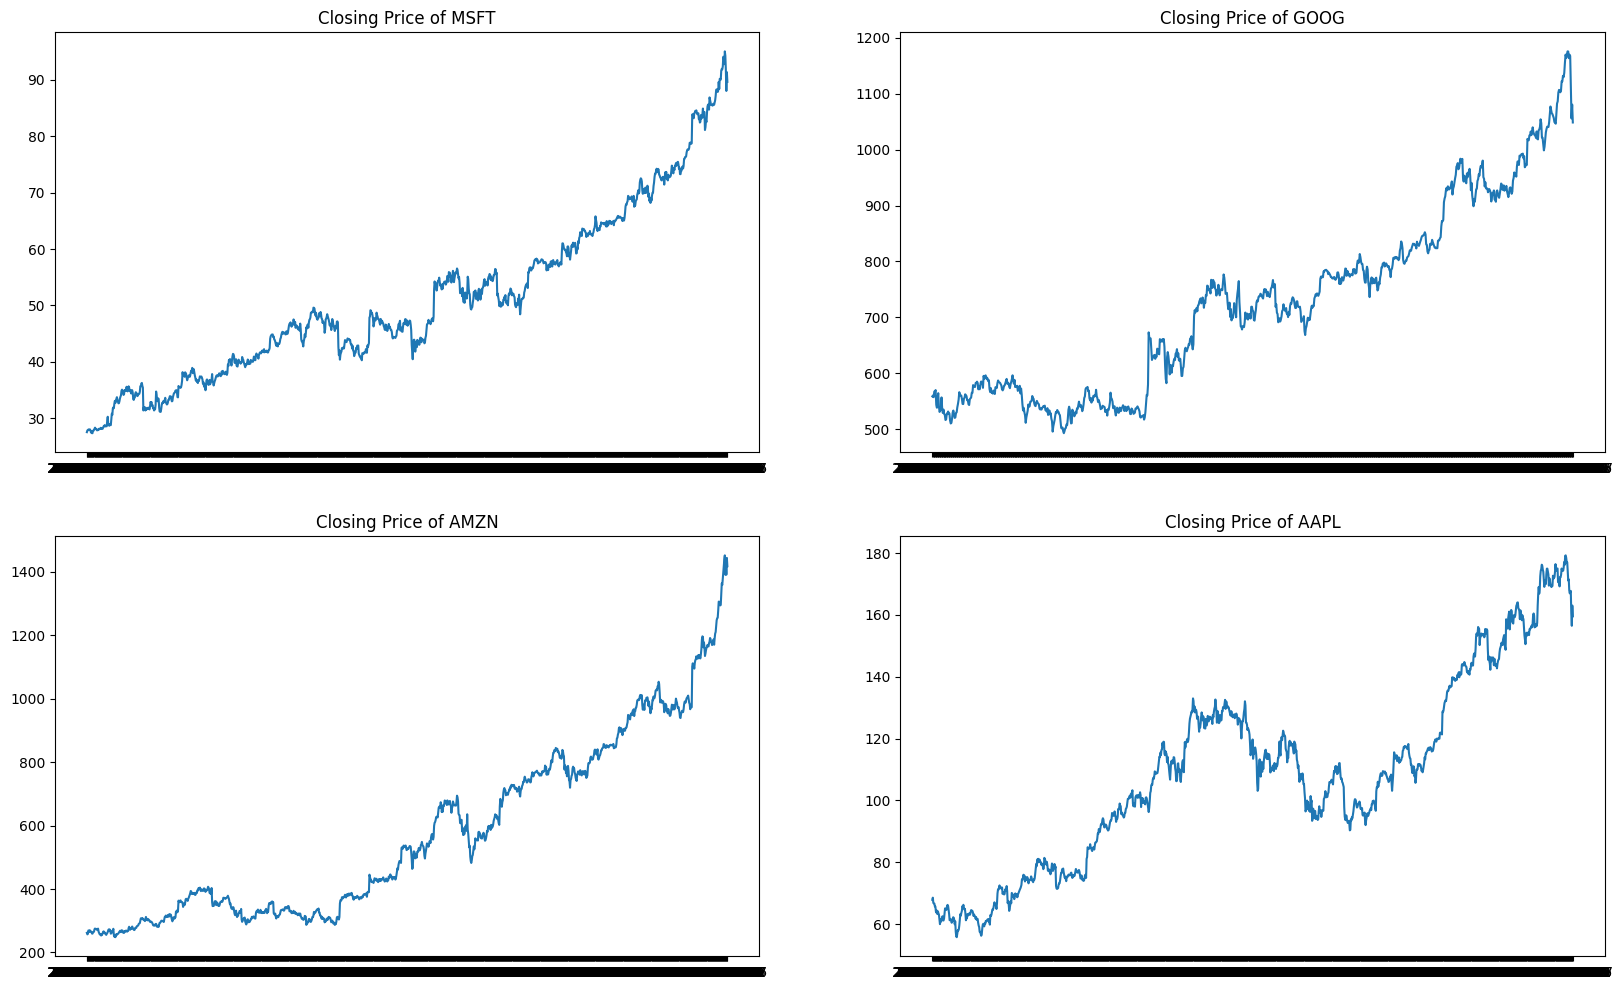

In [ ]:
plt.figure(figsize=(20,12))
for index, company in enumerate(tech_list,1):
  plt.subplot(2,2,index)
  filter1 = all_data['Name']==company
  df = all_data[filter1]
  plt.plot(df['date'],df['close'])
  plt.title(f"Closing Price of {company}")

# Moving Average


In [ ]:
all_data['close'].rolling(window=10).mean().head(20)

,close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,27.8535


In [ ]:
new_data = all_data.copy()

In [ ]:
ma_day = [10,20,50]
for ma in ma_day:
  new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [ ]:
new_data.tail(2)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4750,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640
4751,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554


In [ ]:
new_data.set_index('date',inplace=True)

In [ ]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026


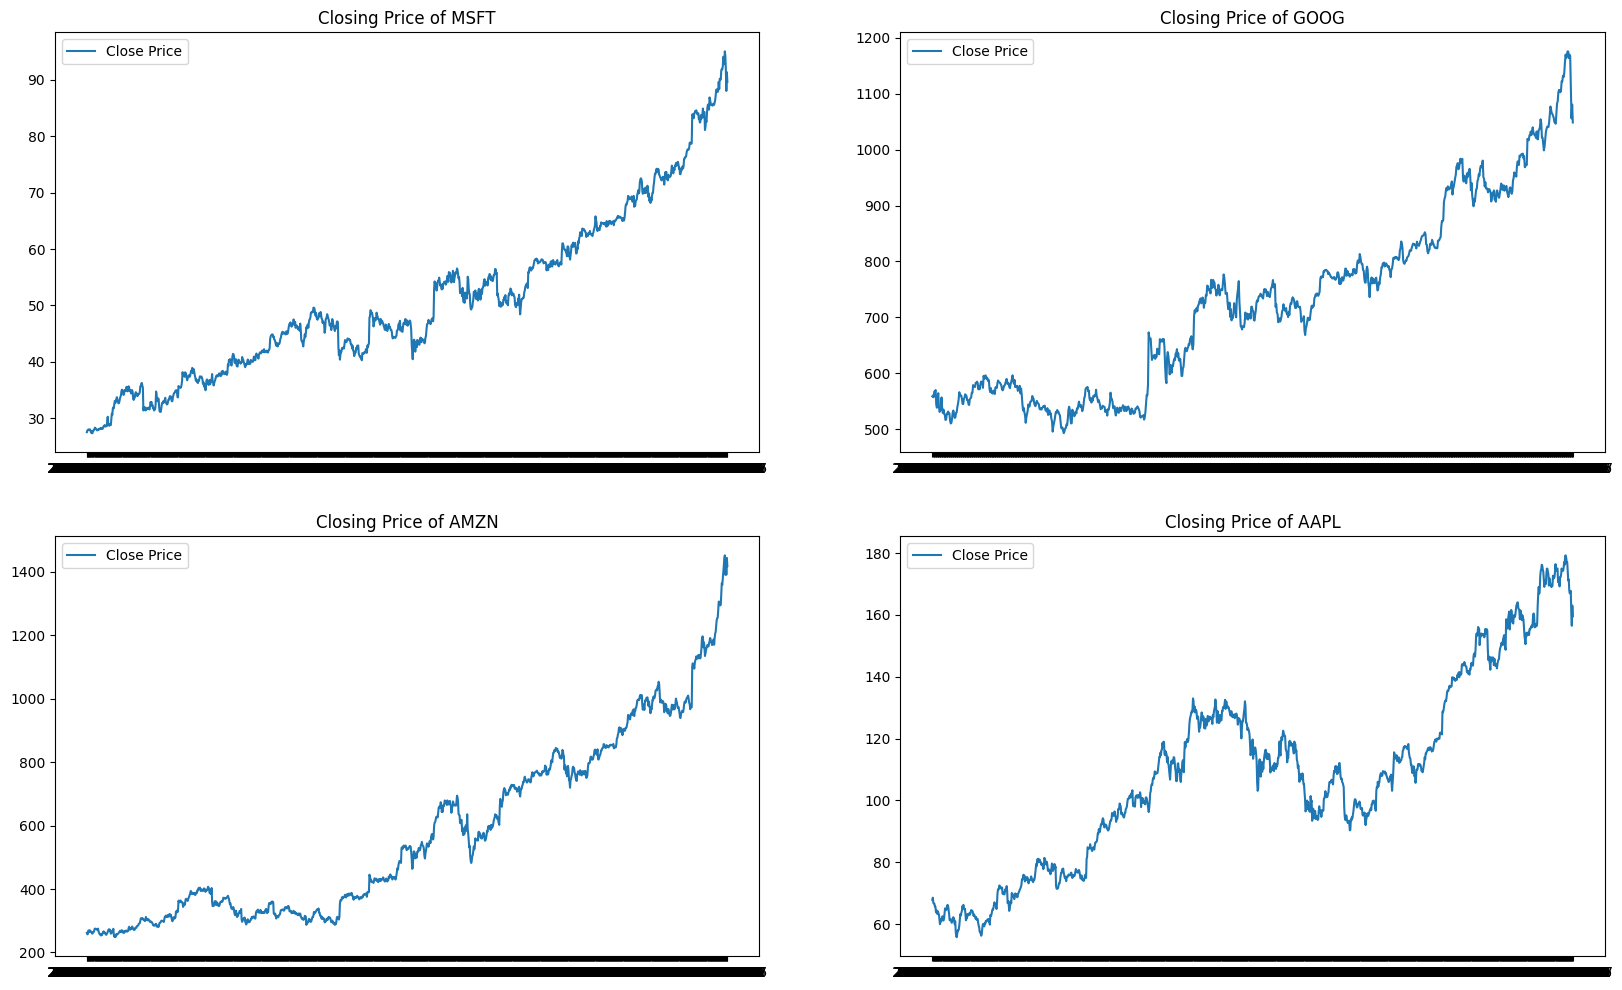

In [ ]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list,1):
  plt.subplot(2,2,index)
  filter1 = all_data['Name']==company
  df = all_data[filter1]
  plt.plot(df['date'],df['close'],label='Close Price')
  plt.title(f"Closing Price of {company}")
  plt.legend()


In [ ]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

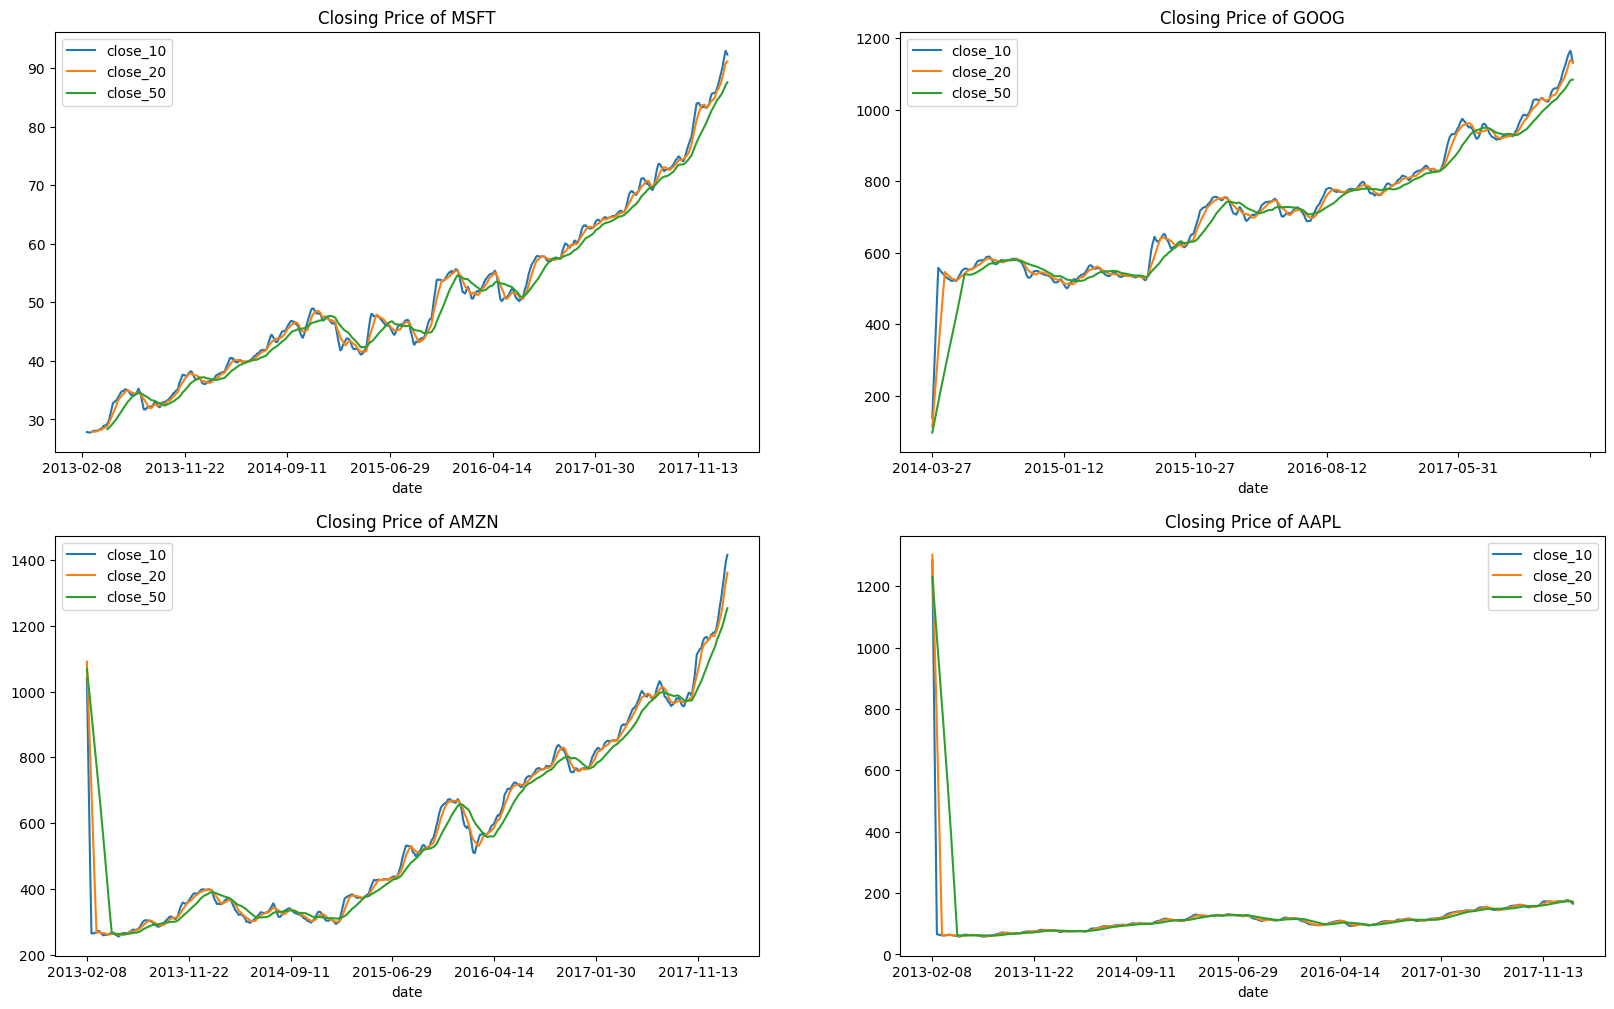

In [ ]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list,1):
  plt.subplot(2,2,index)
  filter1 = new_data['Name']==company
  df = new_data[filter1]
  df[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
  plt.title(f"Closing Price of {company}")
  plt.legend()


# ** Observing Closing Price**

In [ ]:
apple = pd.read_csv('/content/AAPL_data.csv')
apple.head(2)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL


In [ ]:
apple['DailyReturn(in %)'] =  apple['close'].pct_change()*100

In [ ]:
import plotly.express as px

In [ ]:
px.line(apple , x='date' , y='DailyReturn(in %)')

# Resampling data


In [ ]:
apple.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object
DailyReturn(in %),float64


In [ ]:
apple['date'] = pd.to_datetime(apple['date'])

In [ ]:
apple.head()

,date,open,high,low,close,volume,Name,DailyReturn(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [ ]:
apple.set_index('date',inplace=True)

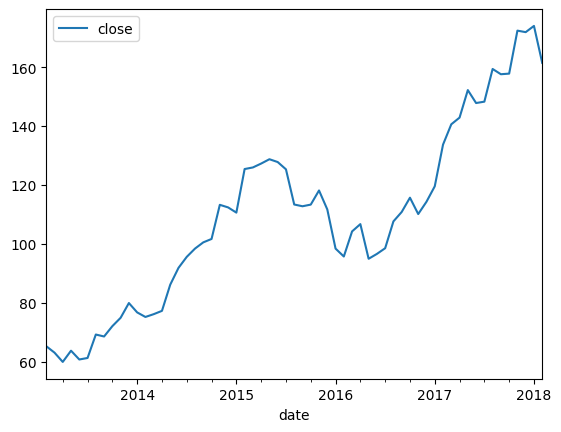

In [ ]:
apple['close'].resample('M').mean().plot() #monthly analysis
plt.legend()

<Axes: xlabel='date'>

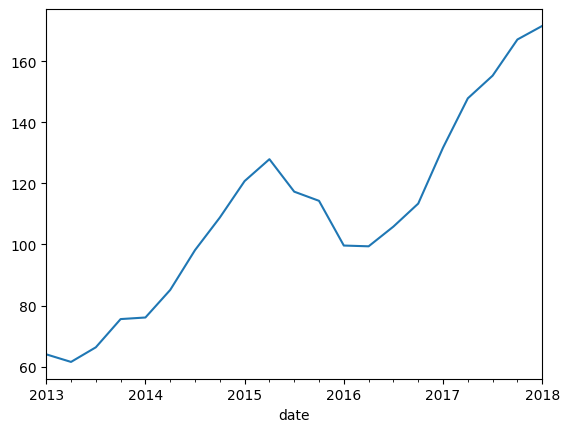

In [ ]:
apple['close'].resample('Q').mean().plot()#quaterly analysis

# Multi Variate Analysis

In [ ]:
AAPL = pd.read_csv('/content/AAPL_data.csv')
AMZN = pd.read_csv('/content/AMZN_data.csv')
GOOG = pd.read_csv('/content/GOOG_data.csv')
MSFT = pd.read_csv('/content/MSFT_data.csv')

In [ ]:
from contextlib import closing
closing_price = pd.DataFrame()

In [ ]:
closing_price['AAPL'] =AAPL['close']
closing_price['AMZN'] =AMZN['close']
closing_price['GOOG'] =GOOG['close']
closing_price['MSFT'] =MSFT['close']

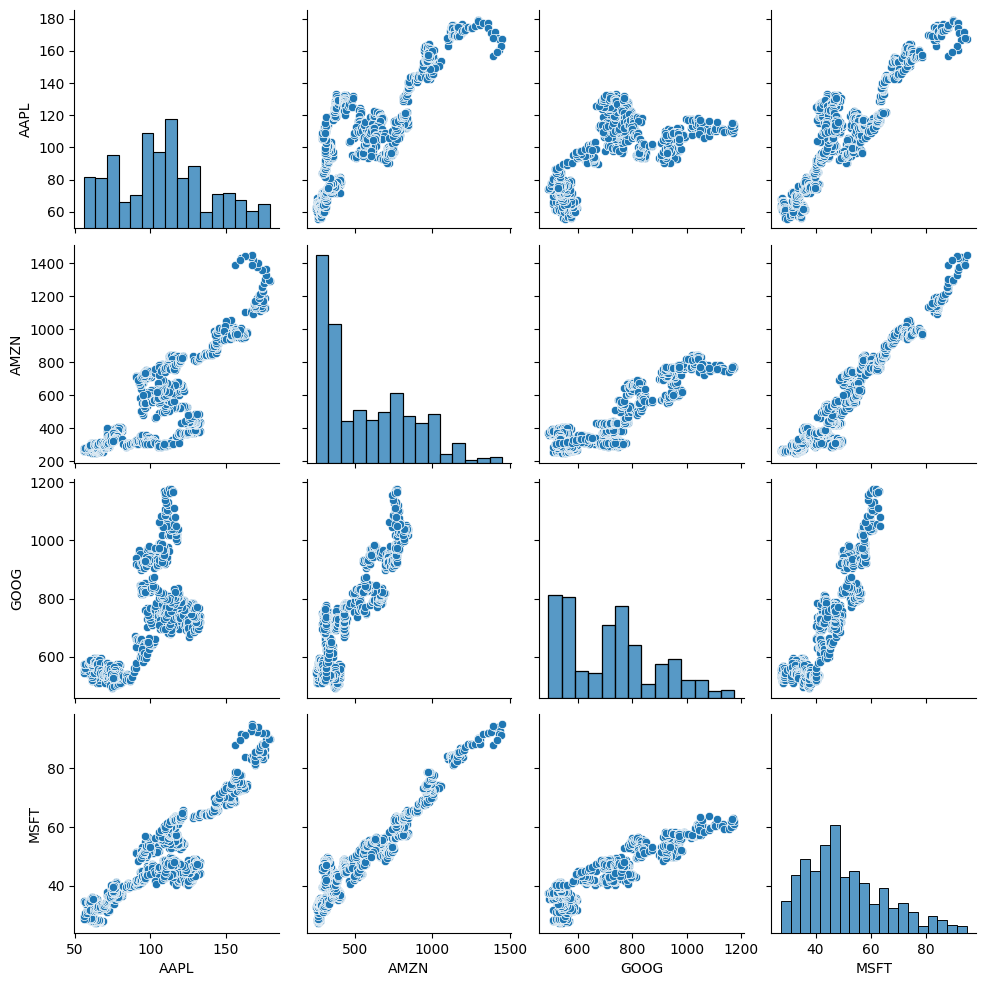

In [ ]:
sns.pairplot(closing_price)

In [ ]:
closing_price.corr()

,AAPL,AMZN,GOOG,MSFT
AAPL,1.000000,0.819078,0.640522,0.899689
AMZN,0.819078,1.000000,0.888456,0.955977
GOOG,0.640522,0.888456,1.000000,0.907011
MSFT,0.899689,0.955977,0.907011,1.000000


from matplotlib import pyplot as plt
_df_0['AAPL'].plot(kind='hist', bins=20, title='AAPL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AMZN'].plot(kind='hist', bins=20, title='AMZN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['GOOG'].plot(kind='hist', bins=20, title='GOOG')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['MSFT'].plot(kind='hist', bins=20, title='MSFT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='AAPL', y='AMZN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='AMZN', y='GOOG', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='GOOG', y='MSFT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['AAPL'].plot(kind='line', figsize=(8, 4), title='AAPL')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['AMZN'].plot(kind='line', figsize=(8, 4), title='AMZN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['GOOG'].plot(kind='line', figsize=(8, 4), title='GOOG')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['MSFT'].plot(kind='line', figsize=(8, 4), title='MSFT')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

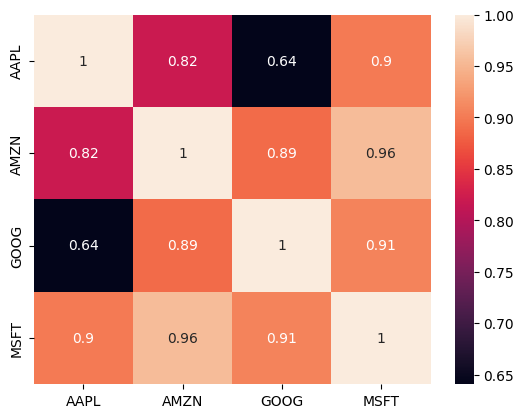

In [ ]:
sns.heatmap(closing_price.corr(),annot=True)

# Co-relational Analysis

In [ ]:
closing_price

,AAPL,AMZN,GOOG,MSFT
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [ ]:
for col in closing_price.columns:
  closing_price[col + '_pct_change'] = (closing_price[col]- closing_price[col].shift(1))/closing_price[col].shift(1)*100

In [ ]:
closing_price

,AAPL,AMZN,GOOG,MSFT,AAPL_pct_change,AMZN_pct_change,GOOG_pct_change,MSFT_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,NaN,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,NaN,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,NaN,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,NaN,3.784091


In [ ]:
closing_price.columns

Index(['AAPL', 'AMZN', 'GOOG', 'MSFT', 'AAPL_pct_change', 'AMZN_pct_change',
       'GOOG_pct_change', 'MSFT_pct_change'],
      dtype='object')

In [ ]:
closing_pct= closing_price[['AAPL_pct_change', 'AMZN_pct_change', 'GOOG_pct_change',
       'MSFT_pct_change']]

In [ ]:
closing_pct.corr()

,AAPL_pct_change,AMZN_pct_change,GOOG_pct_change,MSFT_pct_change
AAPL_pct_change,1.000000,0.287659,0.036202,0.366598
AMZN_pct_change,0.287659,1.000000,0.027698,0.402678
GOOG_pct_change,0.036202,0.027698,1.000000,0.038939
MSFT_pct_change,0.366598,0.402678,0.038939,1.000000


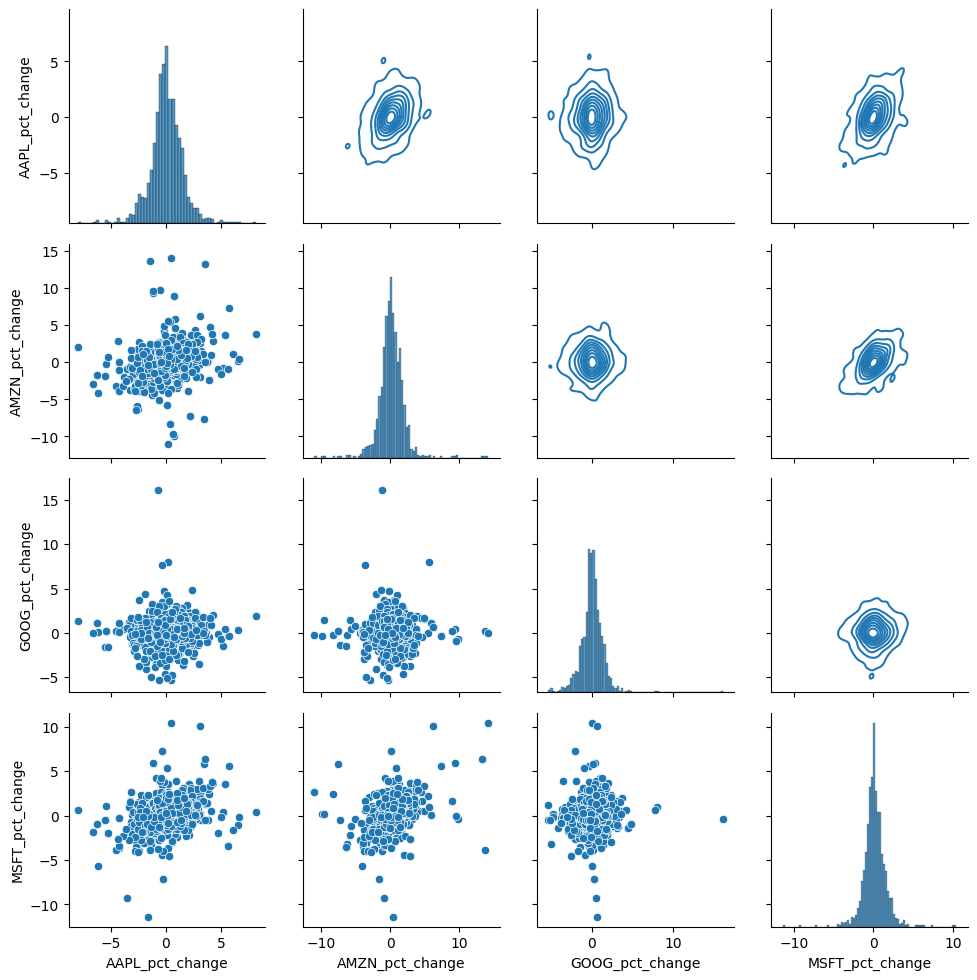

In [ ]:
g = sns.PairGrid(data= closing_pct)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)